# Разведочный анализ датасета с резюме

In [2]:
import pandas as pd

cv_df = pd.read_parquet('./data/ready/lemma_cv_df.parquet')
vacancies_df = pd.read_parquet('./data/ready/lemma_vacancies_df.parquet')

In [3]:
cv_df.describe()

,age,experience,salaryMin,salaryMax
count,324873.000000,336864.000000,336809.000000,336809.00000
mean,40.807162,7.093789,69798.610530,69799.92893
std,27.036823,12.911829,58925.311655,58924.43596
min,-4554.000000,0.000000,0.000000,0.00000
25%,32.000000,1.000000,40000.000000,40000.00000
50%,40.000000,4.000000,55000.000000,55000.00000
75%,49.000000,11.000000,80000.000000,80000.00000
max,2023.000000,2025.000000,1000000.000000,1000000.00000


In [4]:
cv_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 336865 entries, f8fbc170-a190-11e6-841a-ef76bd2a03c1 to 09e77980-f10a-11e5-8918-4376a32b3f45
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype                    
---  ------                       --------------   -----                    
 0   birthday                     324844 non-null  datetime64[ns, UTC]      
 1   gender                       336865 non-null  object                   
 2   age                          324873 non-null  float64                  
 3   positionName                 336849 non-null  object                   
 4   typicalPosition              15092 non-null   object                   
 5   publishedDate                335281 non-null  datetime64[ns, UTC+03:00]
 6   skills                       336864 non-null  object                   
 7   worldskillsInspectionStatus  336865 non-null  bool                     
 8   abilympicsInspectionStatus   336865 non-null  bool    

In [5]:
vacancies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19106 entries, 1bdfbcb0-f9b1-11ef-9ae2-25abf1fceba2 to fdd97dc8-009d-11f0-bdbc-cb26dff57dd7
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype                    
---  ------                    --------------  -----                    
 0   codeProfession            9286 non-null   float64                  
 1   codeProfessionalSphere    19106 non-null  object                   
 2   socialProtecteds          1162 non-null   object                   
 3   languageKnowledge         19106 non-null  object                   
 4   busyType                  10193 non-null  object                   
 5   educationRequirements     19106 non-null  object                   
 6   hardSkills                19106 non-null  object                   
 7   softSkills                19106 non-null  object                   
 8   skills                    19106 non-null  object                   
 9   typicalPosition       

In [253]:
print('Количество атрибутов:', len(cv_df.columns))
cv_df.head()

Количество атрибутов: 31


,birthday,gender,age,positionName,typicalPosition,publishedDate,skills,worldskillsInspectionStatus,abilympicsInspectionStatus,abilympicsParticipation,volunteersInspectionStatus,volunteersParticipation,driveLicenses,experience,otherCertificates,narkCertificate,narkInspectionStatus,additionalEducationList,hardSkills,softSkills,scheduleType,retrainingCapability,businessTrip,languageKnowledge,relocation,salaryMin,salaryMax,shifts,businessActivities,additionalInformation,education
candidateId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
f8fbc170-a190-11e6-841a-ef76bd2a03c1,1989-05-25 20:00:00+00:00,женск,35.0,"архивариус, делопроизводитель.",None,2016-11-22 17:10:01+03:00,[],False,False,False,False,True,[],0.0,None,False,False,[],[],[],полн рабоч ден,True,False,[],False,40000.0,40000.0,None,[],None,средн общ
27700f90-7643-11e5-8f00-833b590698f7,1992-08-01 20:00:00+00:00,женск,32.0,инженер,None,2015-10-20 09:47:57+03:00,[],False,False,False,False,True,[],0.0,дипл 2 степен в хви аспирантск магистерск семи...,False,False,[],[],[],полн рабоч ден,True,False,"[{""codeLanguage"": ""Английский"", ""level"": ""B2 —...",False,30000.0,30000.0,None,[],None,высш бакалавриат
eb785b50-9dbe-11e7-9620-4376a32b3f45,1976-09-28 21:00:00+00:00,мужск,48.0,сотрудник в офис,None,2017-09-20 09:56:06+03:00,[],False,False,False,False,True,"[""B""]",1.0,"школ охра ""скиф"" город москв",False,False,"[{""graduateYear"": 1999, ""organization"": ""Влади...",[],[],полн рабоч ден,True,True,"[{""codeLanguage"": ""Английский"", ""level"": ""A1 —...",False,35000.0,35000.0,None,[],None,средн общ
7426f9a0-9d06-11ee-b6d2-e73e8fa159bf,2002-08-27 20:00:00+00:00,мужск,22.0,младш инженер разработчик,None,2024-02-08 12:25:36+03:00,[],False,False,False,False,True,[],0.0,None,False,False,[],[],[],полн рабоч ден,True,True,[],False,30000.0,30000.0,None,[],None,None
c672ef90-74c3-11ee-804e-e73e8fa159bf,1987-07-17 12:00:00+00:00,женск,37.0,смен мастер,None,2023-10-30 08:05:32+03:00,[],False,False,False,False,True,"[""B""]",11.0,None,False,False,[],[],[],смен работ,True,False,"[{""codeLanguage"": ""Русский"", ""level"": ""A1 — на...",False,55000.0,55000.0,None,[],None,высш бакалавриат


/tmp/ipykernel_64054/3337478262.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, 'publishedDate'),
 Text(1, 0, 'positionName'),
 Text(2, 0, 'additionalEducationList'),
 Text(3, 0, 'birthday'),
 Text(4, 0, 'hardSkills'),
 Text(5, 0, 'otherCertificates'),
 Text(6, 0, 'softSkills'),
 Text(7, 0, 'skills'),
 Text(8, 0, 'languageKnowledge'),
 Text(9, 0, 'salaryMax'),
 Text(10, 0, 'salaryMin'),
 Text(11, 0, 'typicalPosition'),
 Text(12, 0, 'additionalInformation'),
 Text(13, 0, 'businessActivities'),
 Text(14, 0, 'age'),
 Text(15, 0, 'experience'),
 Text(16, 0, 'driveLicenses'),
 Text(17, 0, 'education'),
 Text(18, 0, 'shifts'),
 Text(19, 0, 'scheduleType'),
 Text(20, 0, 'gender'),
 Text(21, 0, 'worldskillsInspectionStatus'),
 Text(22, 0, 'volunteersInspectionStatus'),
 Text(23, 0, 'businessTrip'),
 Text(24, 0, 'abilympicsInspectionStatus'),
 Text(25, 0, 'abilympicsParticipation'),
 Text(26, 0, 'narkCertificate'),
 Text(27, 0, 'narkInspectionStatus'),
 Text(28, 0, 'retrainingCapability'),
 Text(29, 0, 'relocation'),
 Text(30, 0, 'volunteersParticipation')]

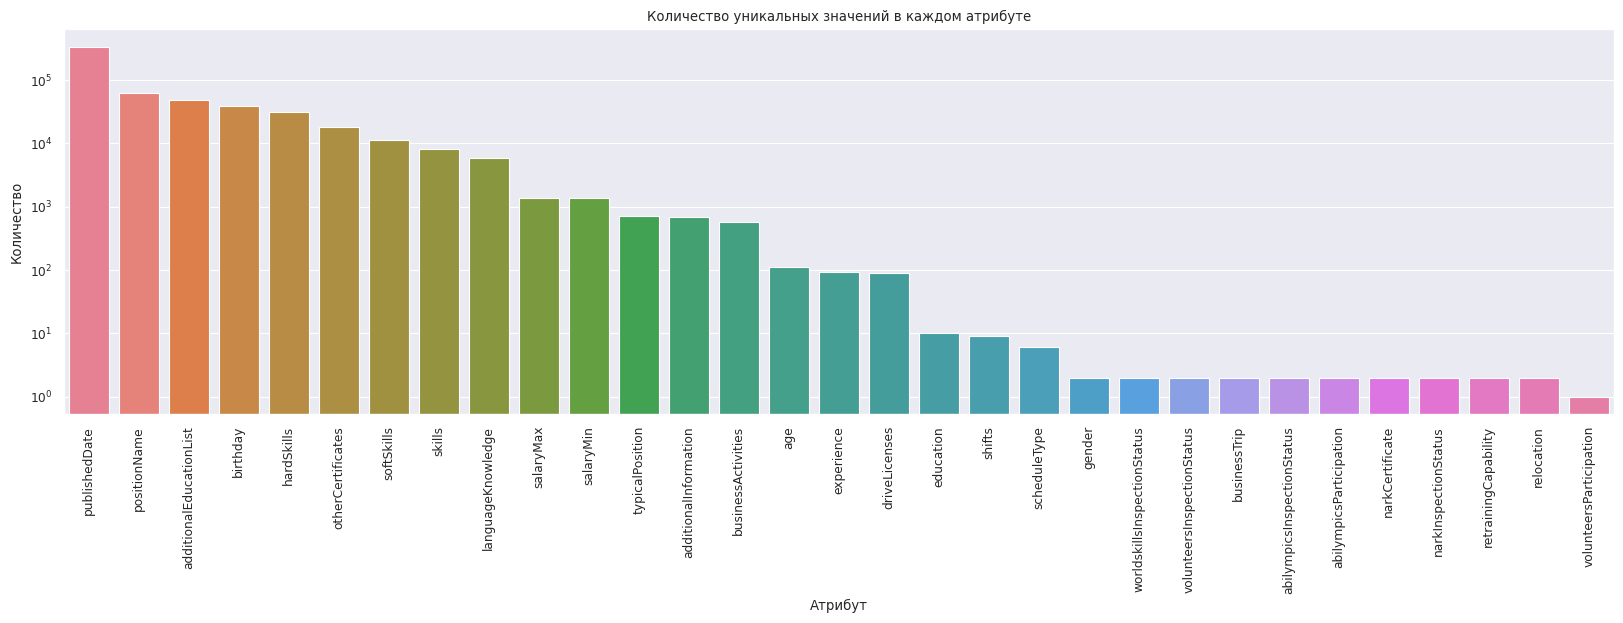

In [316]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))

columns = cv_df.columns
n_uniques = [cv_df[column].nunique() for column in columns]
unique_df = pd.DataFrame(zip(columns, n_uniques)).sort_values(1, ascending=False).T
unique_df.columns = unique_df.iloc[0]
unique_df = unique_df[1:]

sns.set_theme('paper')

ax = sns.barplot(
    data=unique_df,
    log=True
)
ax.set(xlabel="Атрибут", ylabel="Количество", title="Количество уникальных значений в каждом атрибуте")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [255]:
cv_df.abilympicsInspectionStatus.nunique()

2

# Разведочный анализ датасета с вакансиями 

In [250]:
vacancies_df.describe()

,codeProfession,experienceRequirements,needMedcard,retrainingGrantValue,workPlaces,salaryMin,salaryMax,trainingDays
count,9286.000000,18274.000000,6405.000000,30.000000,19106.000000,18218.000000,15510.000000,19106.000000
mean,214478.684148,1.332932,0.160656,31700.000000,3.302889,64153.304260,81724.699678,0.064639
std,53404.010877,1.893435,0.367242,22609.351132,21.828393,42436.063756,54170.889289,1.901268
min,100054.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,181130.750000,0.000000,0.000000,16250.000000,1.000000,35000.000000,55000.000000,0.000000
50%,224469.000000,0.000000,0.000000,30000.000000,1.000000,59000.000000,75735.000000,0.000000
75%,246805.000000,3.000000,0.000000,50000.000000,1.000000,80000.000000,100000.000000,0.000000
max,471226.000000,30.000000,1.000000,75000.000000,1300.000000,800000.000000,1000000.000000,165.000000


In [254]:
print('Количество атрибутов:', len(vacancies_df.columns))
vacancies_df.head()

Количество атрибутов: 44


,codeProfession,codeProfessionalSphere,socialProtecteds,languageKnowledge,busyType,educationRequirements,hardSkills,softSkills,skills,typicalPosition,experienceRequirements,scheduleType,premium,otherVacancyBenefit,careerPerspective,idPriorityCategory,needMedcard,requiredDriveLicense,retrainingCapability,retrainingGrantValue,transportCompensation,companyBusinessSize,workPlaces,isUzbekistanRecruitment,datePublished,accommodationCapability,accommodationType,foreignWorkersCapability,isQuoted,isMobilityProgram,positionRequirements,additionalRequirements,salaryMin,salaryMax,qualifications,responsibilities,hireDate,medicalCertificate,scheduleTypeComment,trainingDays,shift,medicalDocument,benefit,conditions
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1bdfbcb0-f9b1-11ef-9ae2-25abf1fceba2,NaN,sales,None,[],None,"{""educationType"": ""Не указано""}",[],[],[],None,0.0,полный рабочий ден,{},None,True,False,NaN,[],False,NaN,None,small,1,True,2025-03-05 14:00:54+03:00,True,None,True,True,False,None,None,58905.0,75735.0,None,«пятерочка» приглашает на вакансию: продавец к...,NaT,None,None,0,[],None,None,None
464a0d88-c5b7-11ef-96bd-29eee561bb17,209204.0,informationtechnology,None,[],полная занят,"{""educationType"": ""Высшее-специалитет, магистр...",[],[],[],ничего не выбра,2.0,полный рабочий ден,{},None,True,False,NaN,[],False,NaN,None,small,1,True,2025-03-05 15:40:02+03:00,True,None,True,True,False,высшее техническое образование. опыт работы с ...,None,52470.0,52470.0,высшее техническое образование. опыт работы с ...,выполнение запросов на изменение ис; выполн...,NaT,None,None,0,[],None,None,допустим
23e60dd5-b130-11ee-9b60-cb26dff57dd7,277409.0,accountingtaxesmanagement,None,[],полная занят,"{""educationType"": ""Высшее-бакалавриат"", ""educa...",[],[],[],None,3.0,полный рабочий ден,"{""premiumSize"": 25, ""premiumType"": ""MONTHLY""}",None,True,False,NaN,[],False,NaN,None,small,1,True,2025-03-05 16:48:57+03:00,True,None,True,True,False,внутренние организацион распорядительные докум...,None,40000.0,45000.0,внутренние организацион распорядительные докум...,"создание бухгалтерской и налоговой отчетности,...",NaT,None,None,0,[],None,None,оптимальн
1f58a7f8-ddf3-11ef-9bbd-d549be31d974,208894.0,informationtechnology,None,[],полная занят,"{""educationType"": ""Высшее-специалитет, магистр...",[],[],[],ничего не выбра,3.0,полный рабочий ден,{},None,True,False,NaN,[],False,NaN,None,small,1,True,2025-03-05 14:41:17+03:00,True,None,True,True,False,"высшее образование, опыт работы не менее 3 лет5",None,52470.0,52470.0,"высшее образование, опыт работы не менее 3 лет5",оценка и приоритезация зни (запросов на измен...,NaT,None,None,0,[],None,None,допустим
4bc2c13a-f7e9-11ef-9741-e7d0d2cf29b1,204484.0,medicine,None,[],полная занят,"{""educationType"": ""Высшее-специалитет, магистр...",[],[],"[""Подбор очков"", ""Подбор линз""]",врач офтальмолог,0.0,полный рабочий ден,{},None,True,False,NaN,[],False,NaN,None,small,2,True,2025-03-05 10:34:11+03:00,True,None,True,True,False,работа на авторефрактометре. умение подбирать ...,None,96000.0,155000.0,работа на авторефрактометре. умение подбирать ...,профилактический осмотр пациентов (взрослых) н...,NaT,None,None,0,[],None,None,допустим
